## ***import library***

In [29]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from helper_function import find_most_common_phrase_per_cluster

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import nltk
from nltk.corpus import stopwords

In [30]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["course", "learn", "project",'and', 'or', 'the', 'a', 'is', 'in', 'to'])

In [31]:
df = pd.read_csv('data\\coursera\\coursera_processed_data.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3424 non-null   int64  
 1   Course Name         3424 non-null   object 
 2   University          3424 non-null   object 
 3   Difficulty Level    3424 non-null   object 
 4   Course Rating       3424 non-null   float64
 5   Course URL          3424 non-null   object 
 6   Course Description  3424 non-null   object 
 7   Skills              3424 non-null   object 
 8   Rating Category     3253 non-null   object 
 9   University Top 10   3424 non-null   object 
 10  ID                  3424 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 294.4+ KB


In [33]:
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(df['Skills'])

In [34]:
inertia = []
for k in range(4, 26):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    kmeans.inertia_
    inertia.append(kmeans.inertia_)
    # print(df)

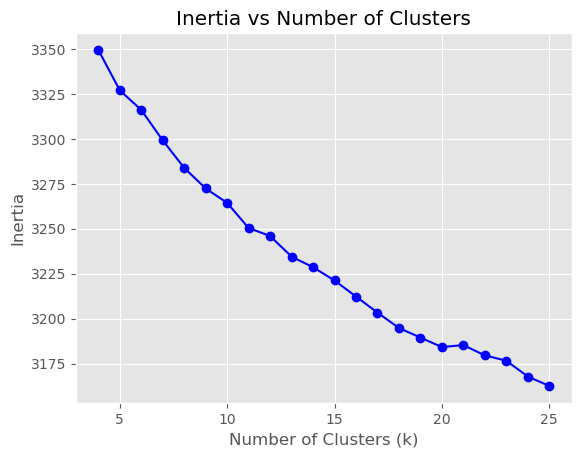

In [35]:
plt.plot(range(4, 26), inertia, marker='o', linestyle='-', color='b')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [36]:
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['Cluster'] = kmeans.labels_
# print(df)

In [37]:
df['Cluster'].value_counts()

Cluster
14    519
12    412
0     366
9     264
3     256
4     231
7     222
5     212
1     200
8     160
13    135
6     128
11    112
10    108
2      99
Name: count, dtype: int64

In [38]:
find_most_common_phrase_per_cluster(df, 'Cluster', 'Skills', custom_stopwords)

{1: [('history', 222),
  ('arts', 212),
  ('art', 205),
  ('arts humanities', 205),
  ('humanities', 205),
  ('music', 173),
  ('music art', 107),
  ('arts humanities music', 106),
  ('humanities music', 106),
  ('humanities music art', 106)],
 9: [('business', 517),
  ('marketing', 408),
  ('strategy', 325),
  ('management', 168),
  ('business strategy', 133),
  ('market', 133),
  ('business business', 127),
  ('business marketing', 106),
  ('business business strategy', 105),
  ('analysis', 98)],
 2: [('engineering', 228),
  ('electrical', 123),
  ('electrical engineering', 120),
  ('science', 99),
  ('design', 91),
  ('engineering electrical', 81),
  ('engineering electrical engineering', 81),
  ('physical', 80),
  ('physical science', 80),
  ('physical science engineering', 80)],
 14: [('finance', 302),
  ('business', 293),
  ('analysis', 171),
  ('sciences', 167),
  ('science', 150),
  ('life', 147),
  ('financial', 146),
  ('life sciences', 142),
  ('business finance', 133),
  ('

In [39]:
# here i use chat-GPT to write suggestion title for each cluster based ont the most common words
cluster_titles = {
    1: "Arts, Humanities, and Music",
    9: "Business and Marketing Strategy",
    2: "Electrical and Physical Engineering",
    14: "Finance and Business Analysis",
    3: "Data Analysis and Data Science",
    12: "Computer Science and Software Development",
    0: "Leadership and Management",
    7: "Health and Life Sciences",
    4: "Machine Learning and Data Science",
    8: "Cloud Computing and Security",
    13: "Law, Society, and Governance",
    10: "Language and Learning",
    6: "Education and Social Sciences",
    11: "Web and Mobile Development",
    5: "Engineering and Physical Sciences"
}

df['Cluster Title'] = df['Cluster'].map(cluster_titles)


In [40]:
df[df['Cluster'] == 9].head()

,Unnamed: 0,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Rating Category,University Top 10,ID,Cluster,Cluster Title
1,1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,4.5-5,Coursera Project Network,2,9,Business and Marketing Strategy
6,6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...,3-3.5,Other,7,9,Business and Marketing Strategy
39,39,Protecting Business Innovations via Patent,The Hong Kong University of Science and Techno...,Beginner,4.8,https://www.coursera.org/learn/protect-busines...,Protecting Business Innovations via Patent Wa...,service innovation Innovation Patent Law in...,4.5-5,Other,40,9,Business and Marketing Strategy
41,41,Global Strategy I: How The Global Economy Works,University of Illinois at Urbana-Champaign,Advanced,4.8,https://www.coursera.org/learn/global-strategy,"Starting in the late 1990s, globalization beca...",relative change and difference economy compe...,4.5-5,University of Illinois at Urbana-Champaign,42,9,Business and Marketing Strategy
47,48,Analyzing Market Attractiveness Using Creately,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/analyzing-marke...,"By the end of this 2 hour-long guided project,...",Financial Analysis market (economics) Strate...,4.5-5,Coursera Project Network,48,9,Business and Marketing Strategy


In [41]:
df.to_csv('data\\coursera\\coursera_processed_data_with_cluster.csv', index=False)